In [2]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# File to Load (Remember to Change These)
file_to_load = "name_clean.csv"

# Read Name File and store into Pandas data frame
name_df = pd.read_csv(file_to_load)
del name_df['Unnamed: 0']
name_df.head()


,decades,state,gender,name,number
0,10s,AK,F,Mary,189
1,10s,AK,F,Margaret,92
2,10s,AK,F,Helen,89
3,10s,AK,F,Annie,53
4,10s,AK,F,Anna,52


In [3]:
Abby = name_df.loc[name_df['name']=='Abby',:]
AK = Abby.loc[Abby['state']=='AK',:]
AK

,decades,state,gender,name,number
495154,80s,AK,F,Abby,8
740022,00s,AK,F,Abby,12
903003,2010s,AK,F,Abby,6


### Top Names of all time, all states, all genders, all decades

In [4]:
top_names = name_df.groupby('name').sum().sort_values(by='number', ascending=False)
top_x = top_names.head(30).reset_index()
top_x

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134
5,Mary,3750838
6,David,3605910
7,Richard,2544867
8,Joseph,2528437
9,Charles,2280600


In [5]:
x_values = [top_x['name'].values[x] for x in range(len(top_x))]
y_values = [top_x['number'].values[x] for x in range(len(top_x))]
color = ['skyblue','skyblue','skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue']

In [6]:
#test_dict = {}
#for index, row in top_x.iterrows():
#    test_dict[row['name']] = row['number']
#print(test_dict)
    

In [7]:
#wc = WordCloud(background_color="white",width=5000,height=5000, max_words=len(test_dict),relative_scaling=1,normalize_plurals=False).generate_from_frequencies(test_dict)
#plt.imshow(wc)

([<matplotlib.axis.XTick at 0x103dbd198>,
 <a list of 30 Text xticklabel objects>)

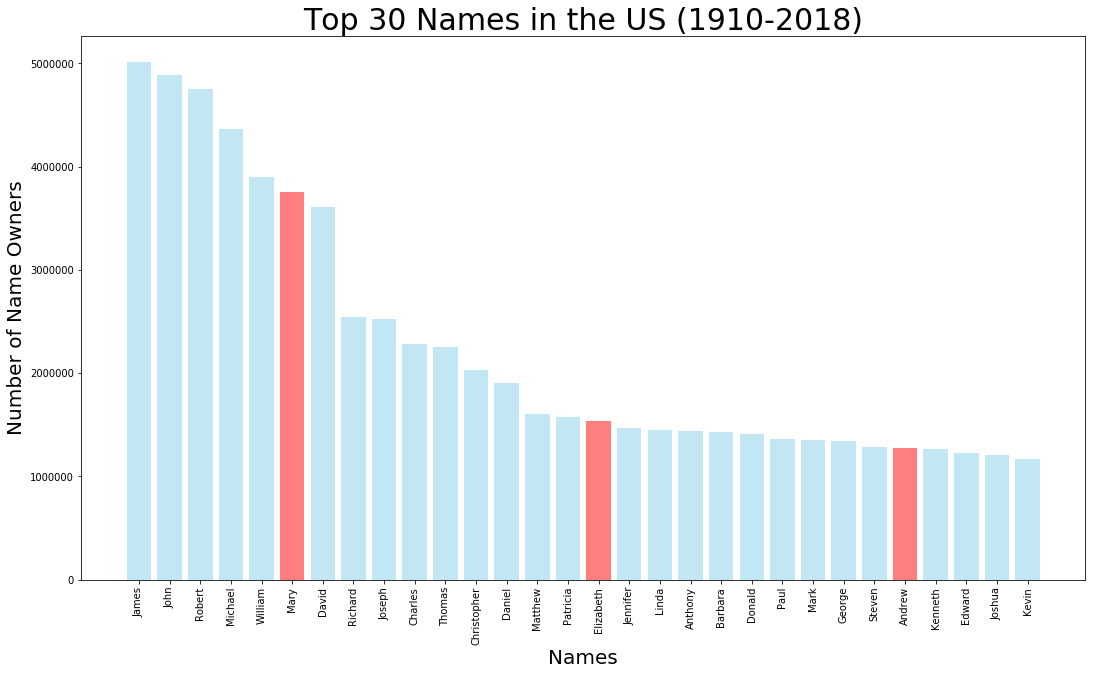

In [8]:
plt.bar(x_values, y_values, color=color, alpha=0.5, align="center")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
# Incorporate the other graph properties
plt.title(f"Top {len(top_x)} Names in the US (1910-2018)",size = 30)
plt.ylabel("Number of Name Owners",size=20)
plt.xlabel("Names",size=20)
plt.xticks(top_x['name'],rotation='vertical')


In [9]:
fig.savefig('top30.png')

In [10]:
# Start with one review:
#text = top_x

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [11]:
test = [top_x['name'].values[i] for i in range(len(top_x))]
test
abc  = top_x.head(5)
abc

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134


### Top Names of all time, all states

In [12]:
name_df2 = name_df.groupby(['gender','name']).sum().reset_index()
top_x_gender = name_df2.groupby(['gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_gender_fin = top_x_gender.reset_index()[top_x_gender.columns[0:6]]
top_x_gender_fin

,gender,name,number
0,F,Mary,3741196
1,F,Patricia,1569022
2,F,Elizabeth,1537684
3,F,Jennifer,1466161
4,F,Linda,1447943
5,M,James,4997327
6,M,John,4869607
7,M,Robert,4734038
8,M,Michael,4349307
9,M,William,3890923


### Top Names by Decade by Gender

In [13]:
name_df3 = name_df.groupby(['decades','gender','name']).sum().reset_index()
sorter = ['10s','20s','30s','40s','50s','60s','70s','80s','90s','00s','2010s']
top_x_decade = name_df3.groupby(['decades','gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_decade_fin = top_x_decade.reset_index()[top_x_decade.columns[0:6]]
top_x_decade_fin.head(10)

,decades,gender,name,number
0,00s,F,Emily,223690
1,00s,F,Madison,193152
2,00s,F,Emma,181257
3,00s,F,Olivia,156000
4,00s,F,Hannah,155698
5,00s,M,Jacob,273844
6,00s,M,Michael,250554
7,00s,M,Joshua,231926
8,00s,M,Matthew,221513
9,00s,M,Daniel,203720


In [14]:
name_df3 = name_df.groupby(['decades','gender','name']).sum().reset_index()

decade_order = ["10s", "20s", "30s", "40s", "50s", "60s", "70s","80s","90s","00s","2010s"]
name_plot = name_df3.set_index("decades").loc[decade_order]
name_plot.head()

,gender,name,number
decades,,,
10s,F,Abbie,625
10s,F,Abigail,25
10s,F,Ada,15053
10s,F,Adah,81
10s,F,Adaline,191


In [15]:
name_F_decade = name_plot.loc[name_plot['gender']=='F',:].groupby(['decades']).count().loc[decade_order].reset_index()
name_M_decade = name_plot.loc[name_plot['gender']=='M',:].groupby(['decades']).count().loc[decade_order].reset_index()
#.loc[['10s','20s','30s','40s','50s','60s','70s','80s','90s','00s','2010s']]
name_M_decade

,decades,gender,name,number
0,10s,2761,2761,2761
1,20s,3324,3324,3324
2,30s,2812,2812,2812
3,40s,2657,2657,2657
4,50s,2804,2804,2804
5,60s,2862,2862,2862
6,70s,3808,3808,3808
7,80s,5033,5033,5033
8,90s,6500,6500,6500
9,00s,7472,7472,7472


In [16]:
F_year = name_F_decade["decades"].tolist()
F_number = name_F_decade["number"].tolist()
M_year = name_M_decade["decades"].tolist()
M_number = name_M_decade["number"].tolist()
#urban_m = bubble_df.loc[bubble_df['type']=='Urban',:].groupby(['city']).mean()

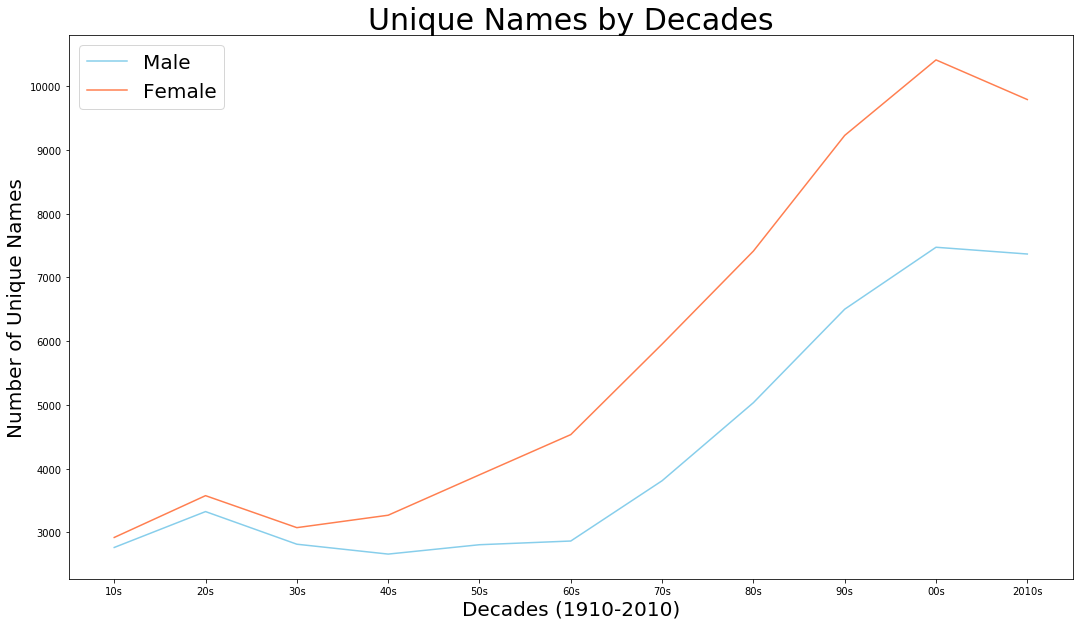

In [17]:
plt.plot(M_year,M_number,color='skyblue',label='Male')
plt.plot(F_year,F_number,color='coral',label='Female')
plt.xlabel("Decades (1910-2010)",size = 20)
plt.ylabel("Number of Unique Names",size = 20)
plt.title(f"Unique Names by Decades",size = 30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
lgnd = plt.legend(loc="upper left", fontsize=20)

In [18]:
fig.savefig('NameDiversity.png')

### MAP DATA

In [37]:
female_df_unique = name_df.loc[name_df['gender']=='F',:].groupby(['gender','state','name']).count().reset_index()
female_df_all_state = name_df.loc[name_df['gender']=='F',:].groupby(['gender','state']).sum().reset_index()


In [20]:
#female_df_unique = name_df.loc[name_df['gender']=='F',:].groupby(['gender','state']).count().reset_index()
#state = female_df_unique["state"].tolist()
#unique = female_df_unique["number"].tolist()
female_df_sum = name_df.loc[name_df['gender']=='F',:].groupby(['gender','state']).sum().reset_index()
female_df_sum
f_state = female_df_sum["state"].tolist()
f_unique = female_df_sum["number"].tolist()

In [36]:
female_df_sum.head()

,gender,state,number
0,F,AK,188886
1,F,AL,2860273
2,F,AR,1676585
3,F,AZ,1698092
4,F,CA,14806607


In [22]:
female_df_unique.head()

,gender,state,decades,name,number
0,F,AK,3107,3107,3107
1,F,AL,13308,13308,13308
2,F,AR,9983,9983,9983
3,F,AZ,11784,11784,11784
4,F,CA,41342,41342,41342


In [23]:
# Combine the data into a single dataset
merge_table_f = pd.merge(female_df_unique, female_df_all_state, on="state")

# Display the data table for preview
#city_df
#merge_table.head()
name_rate_df_f = merge_table_f[['gender_x','state','number_x','number_y']]

#bubble_df.loc[:,'driver_count'] *= 10
name_rate_df_f.head()

,gender_x,state,number_x,number_y
0,F,AK,3107,188886
1,F,AL,13308,2860273
2,F,AR,9983,1676585
3,F,AZ,11784,1698092
4,F,CA,41342,14806607


In [24]:
name_rate_df_f['Name Rate'] = name_rate_df_f['number_x']/name_rate_df_f['number_y']*100
name_rate_df_f.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gender_x,state,number_x,number_y,Name Rate
0,F,AK,3107,188886,1.644908
1,F,AL,13308,2860273,0.465270
2,F,AR,9983,1676585,0.595437
3,F,AZ,11784,1698092,0.693955
4,F,CA,41342,14806607,0.279213


In [25]:
f_state_rate = name_rate_df_f["state"].tolist()
f_name_rate = name_rate_df_f["Name Rate"].tolist()

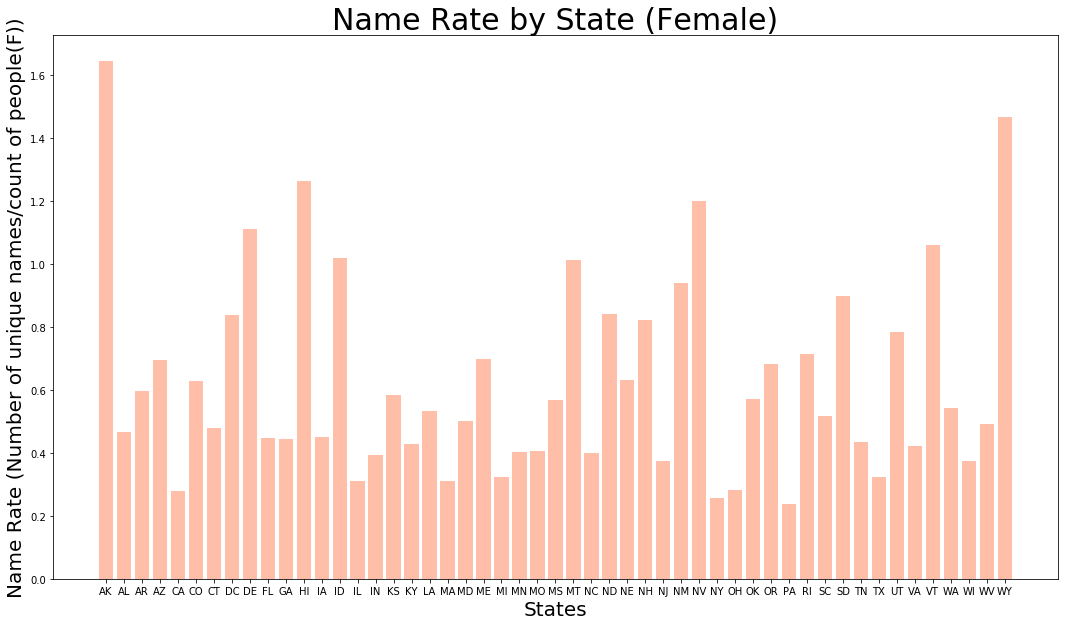

In [26]:
plt.bar(f_state_rate, f_name_rate, color='coral', alpha=0.5, align="center")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
#Incorporate the other graph properties
plt.title(f"Name Rate by State (Female)",size = 30)
plt.ylabel("Name Rate (Number of unique names/count of people(F))",size=20)
plt.xlabel("States",size=20)

fig.savefig('F_Namerate_xState.png')

In [27]:
male_df_unique = name_df.loc[name_df['gender']=='M',:].groupby(['gender','state']).count().reset_index()
male_df_all_state = name_df.loc[name_df['gender']=='M',:].groupby(['gender','state']).sum().reset_index()


In [28]:
# Combine the data into a single dataset
merge_table_m = pd.merge(male_df_unique, male_df_all_state, on="state")

# Display the data table for preview
#city_df
#merge_table.head()
name_rate_df_m = merge_table_m[['gender_x','state','number_x','number_y']]

#bubble_df.loc[:,'driver_count'] *= 10
name_rate_df_m.head()

,gender_x,state,number_x,number_y
0,M,AK,2611,246325
1,M,AL,10582,2997095
2,M,AR,8113,1781993
3,M,AZ,8522,1964962
4,M,CA,27616,16118524


In [29]:
name_rate_df_m['Name Rate'] = name_rate_df_m['number_x']/name_rate_df_m['number_y']*100
name_rate_df_m.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gender_x,state,number_x,number_y,Name Rate
0,M,AK,2611,246325,1.059982
1,M,AL,10582,2997095,0.353075
2,M,AR,8113,1781993,0.455277
3,M,AZ,8522,1964962,0.433698
4,M,CA,27616,16118524,0.171331


In [30]:
m_state_rate = name_rate_df_m["state"].tolist()
m_name_rate = name_rate_df_m["Name Rate"].tolist()

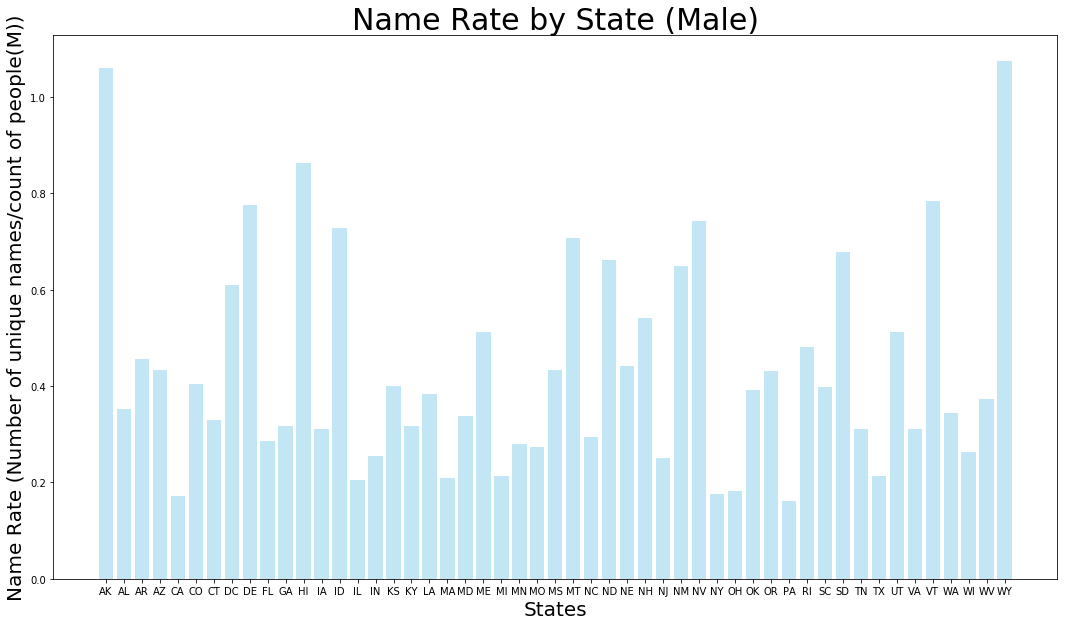

In [31]:
plt.bar(m_state_rate, m_name_rate, color='skyblue', alpha=0.5, align="center")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
#Incorporate the other graph properties
plt.title(f"Name Rate by State (Male)",size = 30)
plt.ylabel("Name Rate (Number of unique names/count of people(M))",size=20)
plt.xlabel("States",size=20)

fig.savefig('M_Namerate_xState.png')

In [39]:
female_df_unique_scatter = name_df.loc[name_df['gender']=='F',:].groupby(['gender','state','name']).sum().reset_index()
female_df_unique_scatter.head()
female_df_unique_scatter = name_df.loc[name_df['gender']=='F',:].groupby(['gender','state','name']).countnam().reset_index()



,gender,state,name,number
0,F,AK,Aaliyah,179
1,F,AK,Abby,26
2,F,AK,Abigail,837
3,F,AK,Ada,5
4,F,AK,Adaline,17


In [47]:
f_state= female_df_unique_scatter["state"].tolist()
f_name= female_df_unique_scatter["number"].tolist()

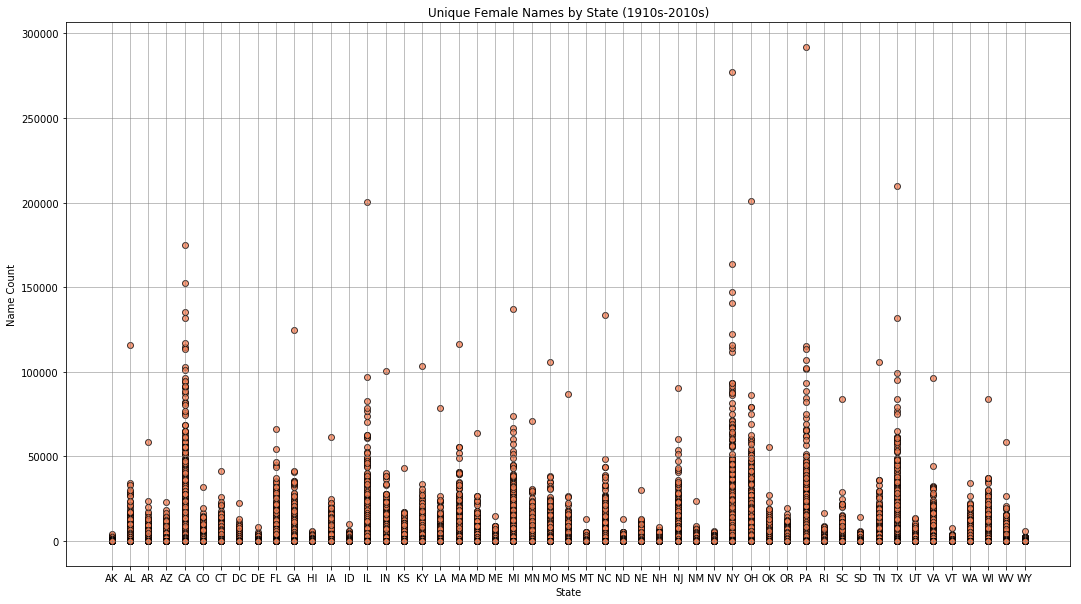

In [48]:
plt.scatter(f_state, f_name, marker="o", facecolors="coral", edgecolors="black", alpha=0.75, label='Rural')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
# Incorporate the other graph properties
plt.title(f"Unique Female Names by State (1910s-2010s)")
plt.ylabel("Name Count")
plt.xlabel("State")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
fig.savefig('Unique_Female_xState.png')

In [59]:
male_df_unique_scatter = name_df.loc[name_df['gender']=='M',:].groupby(['gender','state','name']).sum().reset_index()

male_df_unique_scatter.head()

,gender,state,name,number
0,M,AK,Aaron,1730
1,M,AK,Abel,56
2,M,AK,Abraham,60
3,M,AK,Ace,5
4,M,AK,Adam,1163


In [60]:
m_state= male_df_unique_scatter["state"].tolist()
m_name= male_df_unique_scatter["number"].tolist()

In [61]:
m_name

[1730,
 56,
 60,
 5,
 1163,
 33,
 306,
 309,
 567,
 396,
 466,
 11,
 75,
 5,
 417,
 1553,
 5,
 261,
 5,
 59,
 459,
 6,
 68,
 5,
 7,
 105,
 2761,
 22,
 5,
 5,
 2080,
 135,
 6,
 40,
 7,
 6,
 138,
 586,
 197,
 212,
 20,
 25,
 59,
 11,
 884,
 128,
 68,
 133,
 5,
 29,
 24,
 108,
 64,
 18,
 31,
 2054,
 41,
 12,
 86,
 52,
 10,
 152,
 338,
 6,
 17,
 457,
 5,
 52,
 150,
 20,
 63,
 58,
 560,
 98,
 15,
 5,
 27,
 1771,
 36,
 32,
 327,
 142,
 20,
 10,
 32,
 255,
 10,
 332,
 2291,
 6,
 37,
 5,
 175,
 28,
 542,
 642,
 19,
 297,
 100,
 115,
 33,
 173,
 11,
 923,
 271,
 109,
 676,
 5,
 857,
 5,
 53,
 276,
 360,
 5,
 353,
 23,
 5,
 51,
 5,
 589,
 122,
 11,
 2711,
 242,
 456,
 5,
 11,
 197,
 790,
 10,
 4508,
 12,
 75,
 16,
 239,
 231,
 29,
 180,
 27,
 984,
 20,
 25,
 427,
 261,
 159,
 23,
 11,
 425,
 147,
 690,
 17,
 255,
 106,
 358,
 5,
 285,
 455,
 19,
 487,
 48,
 230,
 410,
 50,
 237,
 77,
 101,
 64,
 94,
 45,
 57,
 4067,
 244,
 39,
 11,
 26,
 45,
 5,
 170,
 293,
 5,
 76,
 23,
 22,
 6622,
 5,
 230,
 5

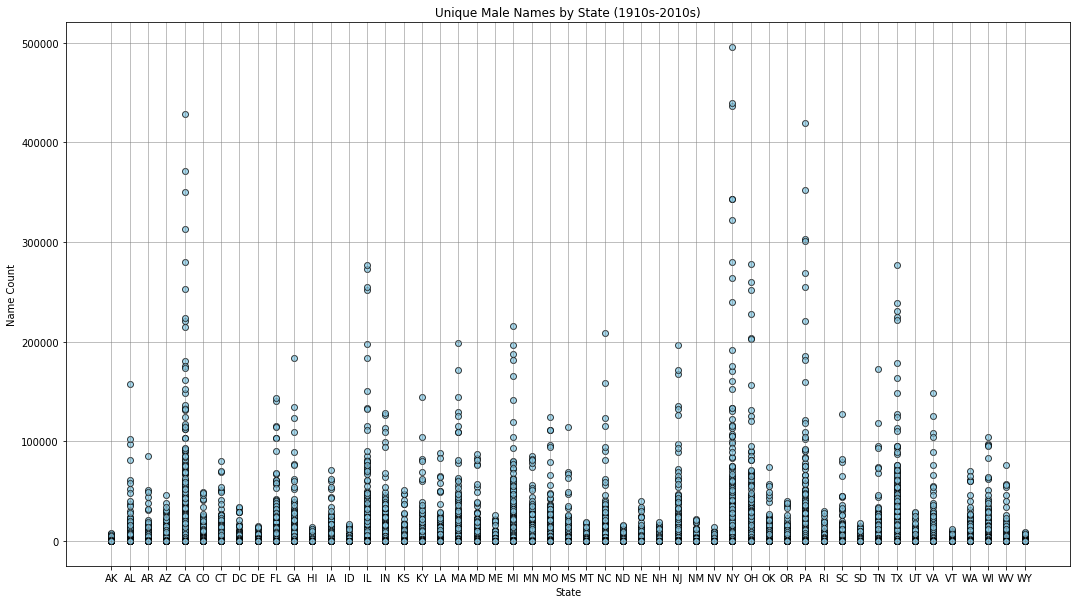

In [62]:
plt.scatter(m_state, m_name, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75, label='Rural')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
# Incorporate the other graph properties
plt.title(f"Unique Male Names by State (1910s-2010s)")
plt.ylabel("Name Count")
plt.xlabel("State")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
fig.savefig('Unique_Male_xState.png')

In [70]:
male_df = name_df.loc[name_df['gender']=='M',:].groupby(['state','name']).sum().reset_index()
male_df
top_m_decadexstate = male_df.groupby(['state'], as_index=False).apply(lambda x: x.nlargest(1, 'number')).sort_values(by='number',ascending=False)
top_m_decadexstate_fin = top_m_decadexstate.reset_index()[top_m_decadexstate.columns[0:6]]
top_m_decadexstate.head(10)

,,state,name,number
34,83553,NY,John,495861
4,13478,CA,Michael,428770
38,96629,PA,John,419332
35,89859,OH,Robert,278223
43,109131,TX,James,277452
14,38956,IL,Robert,276814
22,58343,MI,Robert,215426
27,69262,NC,James,208947
19,50963,MA,John,199205
31,76198,NJ,John,196838


In [71]:
female_df = name_df.loc[name_df['gender']=='F',:].groupby(['state','name']).sum().reset_index()
female_df
top_f_decadexstate = female_df.groupby(['state'], as_index=False).apply(lambda x: x.nlargest(1, 'number')).sort_values(by='number',ascending=False)
top_f_decadexstate_fin = top_f_decadexstate.reset_index()[top_f_decadexstate.columns[0:6]]
top_f_decadexstate.head(10)

,,state,name,number
38,151577,PA,Mary,291999
34,131033,NY,Mary,277015
43,172730,TX,Mary,209982
35,138809,OH,Mary,201197
14,59549,IL,Mary,200130
4,18180,CA,Jennifer,174930
22,90343,MI,Mary,137348
27,109264,NC,Mary,133498
10,45962,GA,Mary,124988
19,80247,MA,Mary,116247
